# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 28s 111ms/step - loss: 0.3297 - accuracy: 0.8553 - val_loss: 0.4872 - val_accuracy: 0.8075
Epoch 2/25
250/250 [==============================] - 27s 110ms/step - loss: 0.3201 - accuracy: 0.8580 - val_loss: 0.4841 - val_accuracy: 0.7975
Epoch 3/25
250/250 [==============================] - 28s 111ms/step - loss: 0.3025 - accuracy: 0.8687 - val_loss: 0.5171 - val_accuracy: 0.7810
Epoch 4/25
250/250 [==============================] - 28s 111ms/step - loss: 0.2868 - accuracy: 0.8737 - val_loss: 0.4597 - val_accuracy: 0.8155
Epoch 5/25
250/250 [==============================] - 28s 112ms/step - loss: 0.2792 - accuracy: 0.8801 - val_loss: 0.4879 - val_accuracy: 0.8105
Epoch 6/25
250/250 [==============================] - 28s 114ms/step - loss: 0.2654 - accuracy: 0.8906 - val_loss: 0.5483 - val_accuracy: 0.7920
Epoch 7/25
250/250 [==============================] - 28s 110ms/step - loss: 0.2585 - accuracy: 0.8901 - val_loss: 0.5047 - val_ac

## Part 4 - Making a single prediction

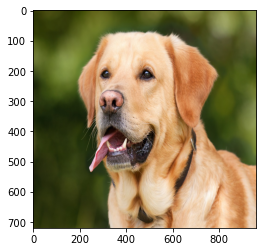

In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

#to show image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dataset/single_prediction/cat_or_dog_1.jpg')
imgplot = plt.imshow(img,aspect=1.3)
plt.show()

In [31]:
print(prediction)

dog
